In [1]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import glob



In [2]:
result_files = []
for i in range(2, 101):
    result_files.append(f"/dice/users/pc24403/BPGGSZ/sig_only_fit/b2dk_output_{i}.txt")

In [3]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
xm = []
yp = []
ym = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if "│ 0 │ x0 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx +=1
            if "│ 1 │ x1 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]                     
                idx += 1
            if "│ 2 │ x2 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            if "│ 3 │ x3 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            log_strings += [l.replace("\n", "")]

    xp.append(ufloat(x[0], dx[0]))
    xm.append(ufloat(x[2], dx[2]))
    yp.append(ufloat(x[1], dx[1]))
    ym.append(ufloat(x[3], dx[3]))

In [4]:
x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, 0.0050, -0.000, -0.0037, -0.0034]

In [5]:
xp

[-0.098+/-0.008,
 -0.091+/-0.008,
 -0.087+/-0.008,
 -0.088+/-0.008,
 -0.097+/-0.008,
 -0.081+/-0.008,
 -0.1+/-0.008,
 -0.098+/-0.008,
 -0.089+/-0.008,
 -0.071+/-0.008,
 -0.093+/-0.007,
 -0.089+/-0.008,
 -0.094+/-0.008,
 -0.08+/-0.007,
 -0.089+/-0.008,
 -0.091+/-0.008,
 -0.09+/-0.008,
 -0.088+/-0.008,
 -0.083+/-0.008,
 -0.108+/-0.007,
 -0.092+/-0.008,
 -0.084+/-0.008,
 -0.085+/-0.008,
 -0.093+/-0.008,
 -0.09+/-0.008,
 -0.083+/-0.008,
 -0.099+/-0.008,
 -0.089+/-0.008,
 -0.101+/-0.008,
 -0.091+/-0.007,
 -0.066+/-0.008,
 -0.081+/-0.007,
 -0.097+/-0.008,
 -0.092+/-0.008,
 -0.101+/-0.008,
 -0.095+/-0.008,
 -0.104+/-0.008,
 -0.079+/-0.007,
 -0.091+/-0.008,
 -0.082+/-0.008,
 -0.093+/-0.008,
 -0.095+/-0.008,
 -0.093+/-0.008,
 -0.092+/-0.008,
 -0.092+/-0.008,
 -0.101+/-0.008,
 -0.087+/-0.008,
 -0.085+/-0.008,
 -0.114+/-0.008,
 -0.087+/-0.008,
 -0.075+/-0.008,
 -0.087+/-0.008,
 -0.075+/-0.008,
 -0.101+/-0.008,
 -0.104+/-0.008,
 -0.082+/-0.008,
 -0.092+/-0.008,
 -0.098+/-0.008,
 -0.09+/-0.008,
 -0

In [6]:
xp_pull = []
yp_pull = []
xm_pull = []
ym_pull = []

for i in range(len(xp)):
    xp_pull.append((xp[i].n-x_exp[0])/xp[i].s)
    yp_pull.append((yp[i].n-x_exp[1])/yp[i].s)
    xm_pull.append((xm[i].n-x_exp[2])/xm[i].s)
    ym_pull.append((ym[i].n-x_exp[3])/ym[i].s)


Text(0.5, 0.5, 'mean: 0.07\nstd: 1.1')

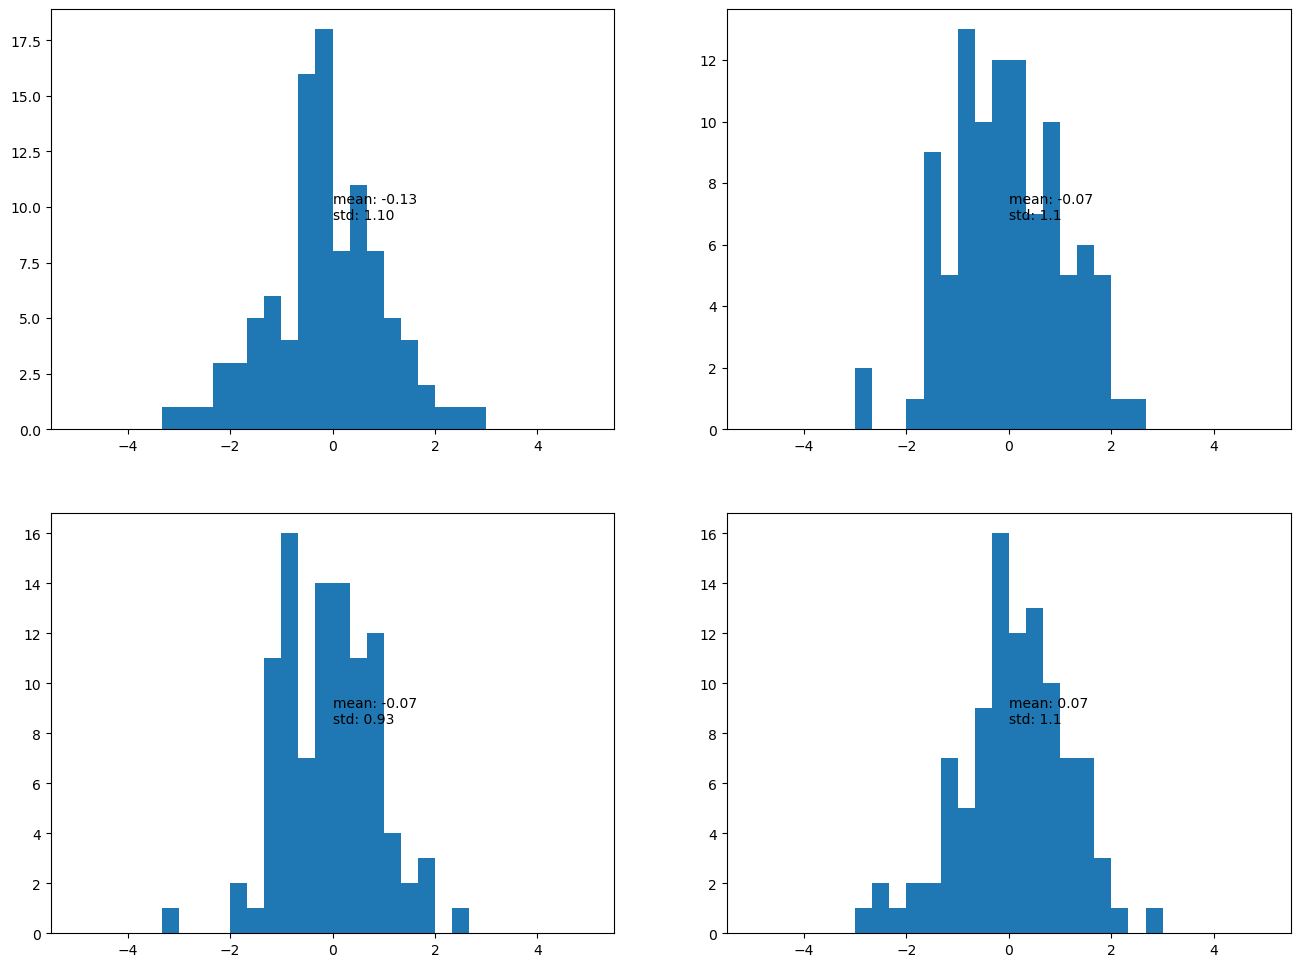

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_pull, bins=30, range=(-5, 5))
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_pull):.2f}\nstd: {np.std(xp_pull):.2f}", transform=ax1.transAxes)

ax2.hist(yp_pull, bins=30, range=(-5, 5))
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_pull):.2f}\nstd: {np.std(yp_pull):.2}", transform=ax2.transAxes)

ax3.hist(xm_pull, bins=30, range=(-5, 5))
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_pull):.2f}\nstd: {np.std(xm_pull):.2}", transform=ax3.transAxes)

ax4.hist(ym_pull, bins=30, range=(-5, 5))
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_pull):.2f}\nstd: {np.std(ym_pull):.2}", transform=ax4.transAxes)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 300.2                      │              Nfcn = 38               │
│ EDM = 5.83e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

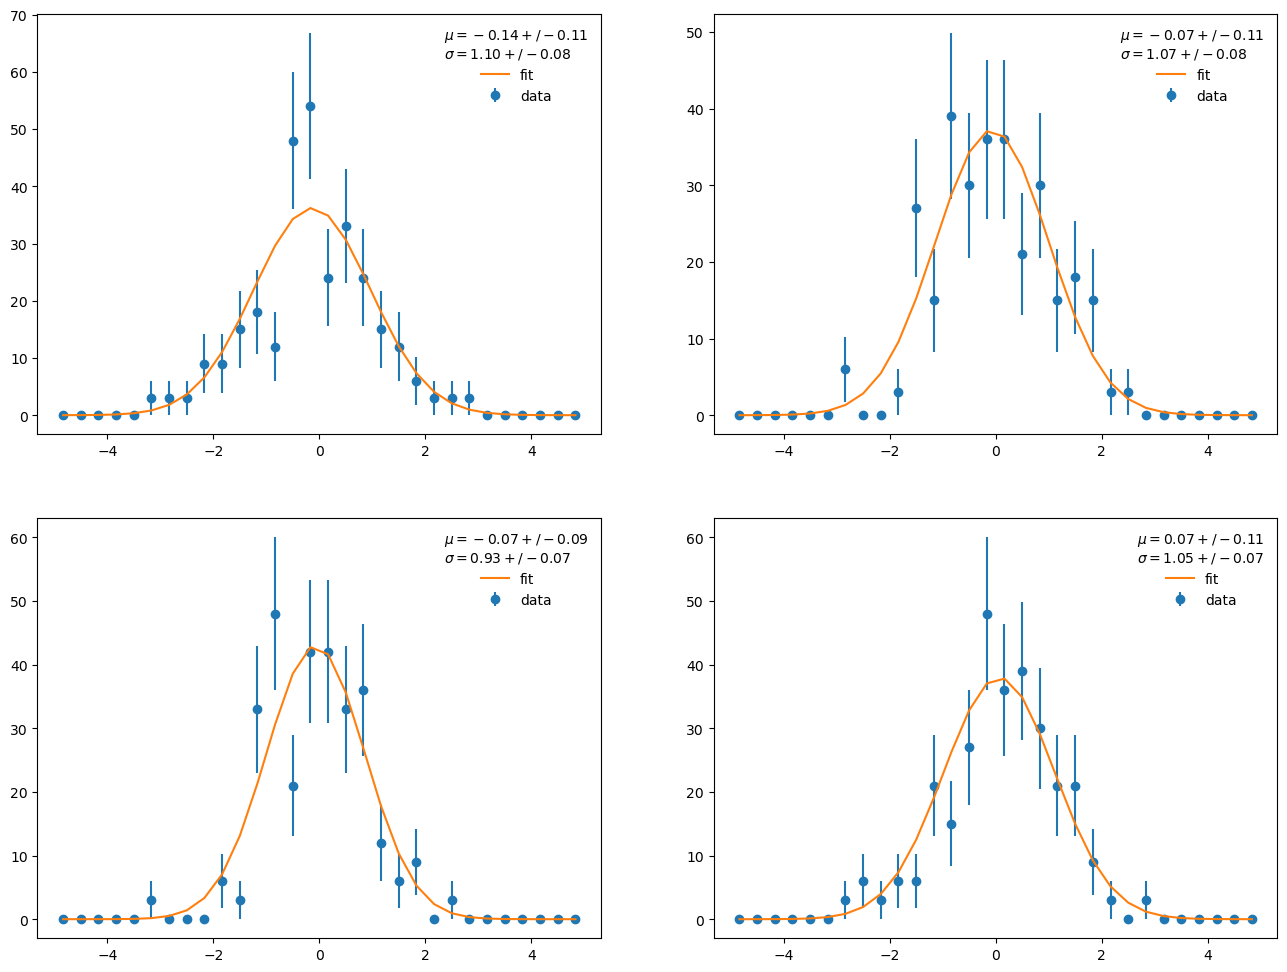

In [8]:
#Fit with Gaussian with iminuit
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

ax= [ax1, ax2, ax3, ax4]

fig, ((ax[0], ax[1]), (ax[2], ax[3])) = plt.subplots(2, 2, figsize=(8*2, 6*2))
i=0
for data in [xp_pull, yp_pull, xm_pull, ym_pull]:
    def pdf(x, mu, sigma):
        return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    
    c = UnbinnedNLL(data, pdf)
    
    m = Minuit(c, mu=0, sigma=1)
    m.migrad()
    m.hesse()
    print(m)
    
    w, xe = np.histogram(data, bins=30, range=(-5, 5))
    
    # compute bin-wise density estimates
    werr = w ** 0.5
    cx = 0.5 * (xe[1:] + xe[:-1])
    dx = np.diff(xe)
    d = w / dx
    derr = werr / dx
    #m.visualize()
# plot everything


    ax[i].errorbar(cx, d, derr, fmt="o", label="data", zorder=0)
    ax[i].plot(cx, 100*pdf(cx, m.values[0], m.values[1]),
         label="fit")
    ax[i].legend(frameon=False,
           title=f"$\mu = {m.values[0]:.2f} +/- {m.errors[0]:.2f}$\n"
                 f"$\sigma = {m.values[1]:.2f} +/- {m.errors[1]:.2f}$");
    i+=1

In [9]:
xp_res = []
yp_res = []
xm_res = []
ym_res = []


for i in range(len(xp)):
    xp_res.append((xp[i].n-x_exp[0]))
    yp_res.append((yp[i].n-x_exp[1]))
    xm_res.append((xm[i].n-x_exp[2]))
    ym_res.append((ym[i].n-x_exp[3]))



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -659.2                     │              Nfcn = 44               │
│ EDM = 1.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

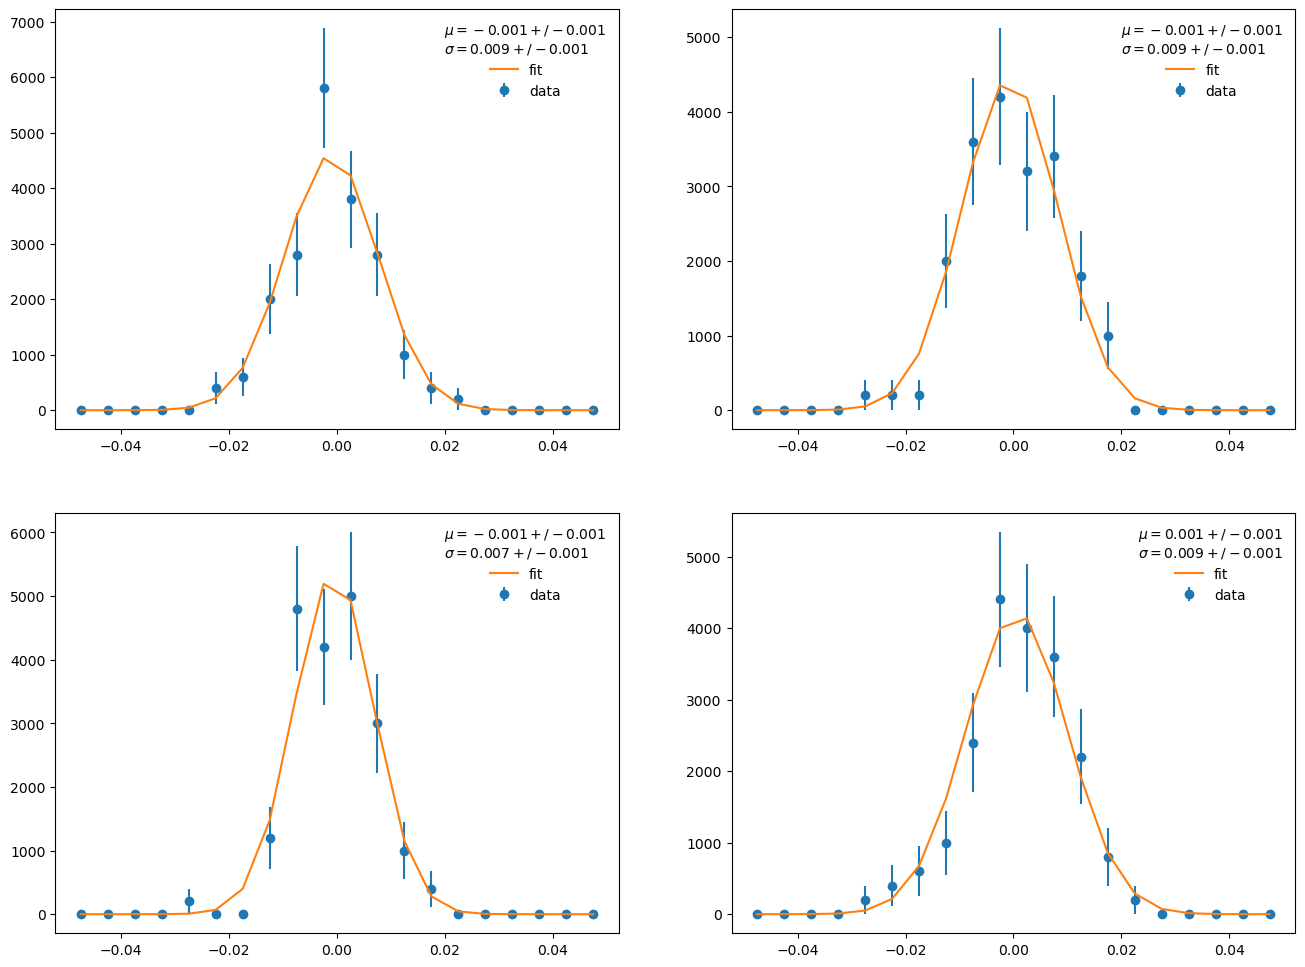

In [10]:
#Fit with Gaussian with iminuit
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

ax= [ax1, ax2, ax3, ax4]
bound = [0.05, 0.05, 0.05, 0.05]

fig, ((ax[0], ax[1]), (ax[2], ax[3])) = plt.subplots(2, 2, figsize=(8*2, 6*2))
i=0
for data in [xp_res, yp_res, xm_res, ym_res]:
    def pdf(x, mu, sigma):
        return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    
    c = UnbinnedNLL(data, pdf)
    
    m = Minuit(c, mu=0, sigma=0.01)
    m.migrad()
    m.hesse()
    print(m)
    
    w, xe = np.histogram(data, bins=20, range=(-bound[i], bound[i]))
    
    # compute bin-wise density estimates
    werr = w ** 0.5
    cx = 0.5 * (xe[1:] + xe[:-1])
    dx = np.diff(xe)
    d = w / dx
    derr = werr / dx
    #m.visualize()
# plot everything


    ax[i].errorbar(cx, d, derr, fmt="o", label="data", zorder=0)
    ax[i].plot(cx, 100*pdf(cx, m.values[0], m.values[1]),
         label="fit")
    ax[i].legend(frameon=False,
           title=f"$\mu = {m.values[0]:.3f} +/- {m.errors[0]:.3f}$\n"
                 f"$\sigma = {m.values[1]:.3f} +/- {m.errors[1]:.3f}$");
    i+=1

In [11]:
result_files = []
for i in range(2, 101):
    result_files.append(f"/dice/users/pc24403/BPGGSZ/sig_only_fit/b2dpi_output_{i}.txt")

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp_dpi = []
xm_dpi = []
yp_dpi = []
ym_dpi = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if "│ 0 │ x0 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx +=1
            if "│ 1 │ x1 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]                     
                idx += 1
            if "│ 2 │ x2 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            if "│ 3 │ x3 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            log_strings += [l.replace("\n", "")]

    xp_dpi.append(ufloat(x[0], dx[0]))
    xm_dpi.append(ufloat(x[2], dx[2]))
    yp_dpi.append(ufloat(x[1], dx[1]))
    ym_dpi.append(ufloat(x[3], dx[3]))

    #a=umath.degrees(0.5 * (umath.atan((-xp * ym + xm * yp)/(xp*xm + yp * ym)) + math.pi))

    #print("Result is {:.2u}".format(a))

#norm = a.n
#err = a.s

In [12]:
xp_dpi_pull = []
yp_dpi_pull = []
xm_dpi_pull = []
ym_dpi_pull = []

for i in range(len(xp_dpi)):
    xp_dpi_pull.append((xp_dpi[i].n-x_exp[4])/xp_dpi[i].s)
    yp_dpi_pull.append((yp_dpi[i].n-x_exp[5])/yp_dpi[i].s)
    xm_dpi_pull.append((xm_dpi[i].n-x_exp[6])/ym_dpi[i].s)
    ym_dpi_pull.append((ym_dpi[i].n-x_exp[7])/xm_dpi[i].s)


In [13]:
print(xp_dpi)

[0.0045+/-0.0021, 0.0051+/-0.0021, 0.0033+/-0.0021, 0.0037+/-0.0021, 0.0052+/-0.0021, 0.0039+/-0.0021, 0.0051+/-0.0021, 0.0063+/-0.0021, 0.0048+/-0.0021, 0.0042+/-0.0021, 0.0056+/-0.0021, -0.0015+/-0.0021, 0.0045+/-0.0021, 0.0025+/-0.0021, 0.0049+/-0.0021, 0.006+/-0.0021, 0.0023+/-0.0021, 0.0047+/-0.0021, 0.0027+/-0.0021, 0.0028+/-0.0021, 0.002+/-0.0021, 0.0022+/-0.0021, 0.0035+/-0.0021, 0.0023+/-0.0021, 0.003+/-0.0021, 0.0066+/-0.0021, 0.0038+/-0.0021, 0.0041+/-0.0021, 0.0031+/-0.0021, 0.0073+/-0.0021, 0.0038+/-0.0021, 0.0032+/-0.0021, 0.0048+/-0.0021, 0.0012+/-0.0021, 0.0036+/-0.0021, 0.0039+/-0.0021, 0.0065+/-0.0021, 0.0029+/-0.0021, 0.0085+/-0.0021, 0.0065+/-0.0021, 0.0055+/-0.0021, 0.0044+/-0.0021, 0.0044+/-0.0021, 0.0059+/-0.0021, 0.0031+/-0.0021, 0.0024+/-0.0021, 0.004+/-0.0021, 0.0044+/-0.0021, 0.0049+/-0.0021, 0.0063+/-0.0021, 0.0053+/-0.0021, 0.004+/-0.0021, 0.0034+/-0.0021, 0.0091+/-0.0021, 0.004+/-0.0021, 0.0047+/-0.0021, 0.0042+/-0.0021, 0.005+/-0.0021, 0.0057+/-0.0021, 0.

Text(0.7, 6.7, ' RMS: 1.33')

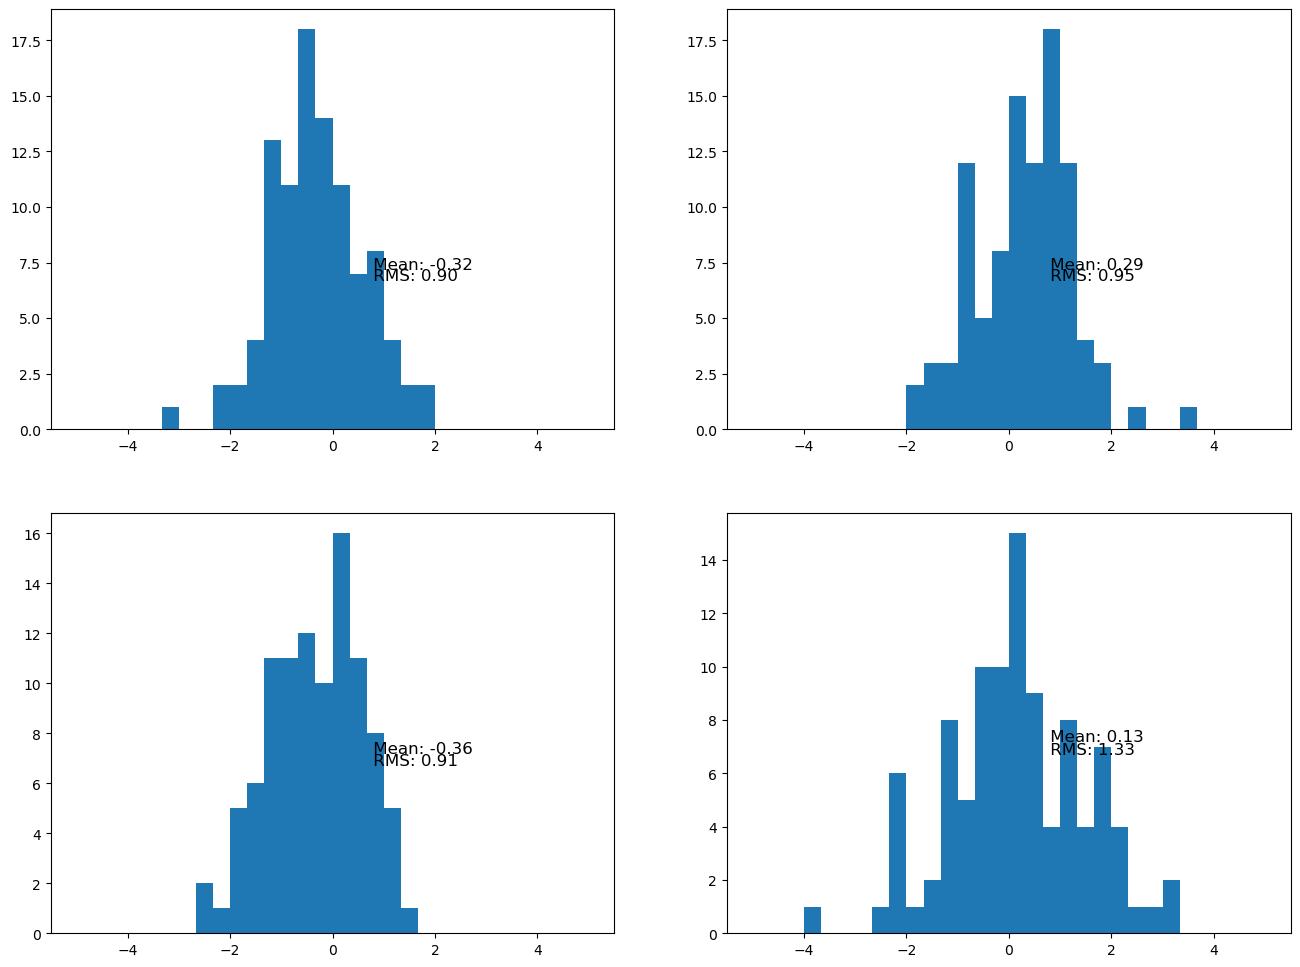

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_dpi_pull, bins=30, range=(-5, 5))
ax1.text(0.7, 7.2, f" Mean: %.2f" % np.mean(xp_dpi_pull), fontsize=12)
ax1.text(0.7, 6.7, f" RMS: %.2f" % np.std(xp_dpi_pull), fontsize=12)

ax2.hist(yp_dpi_pull, bins=30, range=(-5, 5))
ax2.text(0.7, 7.2, f" Mean: %.2f" % np.mean(yp_dpi_pull), fontsize=12)
ax2.text(0.7, 6.7, f" RMS: %.2f" % np.std(yp_dpi_pull), fontsize=12)

ax3.hist(xm_dpi_pull, bins=30, range=(-5, 5))
ax3.text(0.7, 7.2, f" Mean: %.2f" % np.mean(xm_dpi_pull), fontsize=12)
ax3.text(0.7, 6.7, f" RMS: %.2f" % np.std(xm_dpi_pull), fontsize=12)

ax4.hist(ym_dpi_pull, bins=30, range=(-5, 5))
ax4.text(0.7, 7.2, f" Mean: %.2f" % np.mean(ym_dpi_pull), fontsize=12)
ax4.text(0.7, 6.7, f" RMS: %.2f" % np.std(ym_dpi_pull), fontsize=12)

In [15]:
idx = 0
idxs = []
x = []
dx = []
cov = []
foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
with open(result_file) as f:
    for l in f:
        if "│ 0 │ x0 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            error = float(a[7])
            dx += [error]
            idxs += [idx]
            idx +=1
        if "│ 1 │ x1 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]                     
            idx += 1
        if "│ 2 │ x2 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        if "│ 3 │ x3 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        log_strings += [l.replace("\n", "")]
xp = ufloat(x[0], dx[0])
xm = ufloat(x[2], dx[2])
yp = ufloat(x[1], dx[1])
ym = ufloat(x[3], dx[3])

a = umath.degrees(0.5 * (umath.atan((-xp * ym + xm * yp)/(xp*xm + yp * ym)) + math.pi))

print("Result is {:.2u}".format(a))

norm = a.n
err = a.s

Result is 74.5+/-9.4
